Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
os.getcwd()

'C:\\Users\\Rhea\\Downloads'

In [3]:
bank_df= pd.read_csv('bank_marketing_part1_Data.csv')
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


From the above it is evident that the data consists of 210 entries with 7 columns in total. All these columns are numerical in nature. The different variables in this dataset are spending representing the amount spent by the customers, advance_payments representing the amount paid by the customer in advance by cash, probability_of_full_payment representing probability of full payment done by the customer to the bank, current_balance representing the balance amount left in the bank to make purchases, credit_limit representing the limit of amount in the credit card, min_payment_amt representing the minimum payment made by customers on monthly purchases and max_spent_in_single_shopping representing the maximum amount spent in one go. There are no non-null values present in the dataset. 

In [6]:
bank_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


The above Table has been derived using descriptive statistics to summarise the data. The function used is “df.describe(include=’all’)”. We can see the mean, count, median, standard deviation, quartile values, etc with this function. When a check for duplicates were done, there were none. The dataset looks good to go.

In [7]:
bank_df.shape

(210, 7)

In [8]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
dups=bank_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


DATA VISUALISATION

Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

A.	UNIVARIATE ANALYSIS:

Univariate Analysis is the most basic form of statistical data analysis. It helps us individually asses the variables available to us in the dataset. With regards to data given, a histogram and boxplot has been individually created for each of the variables.


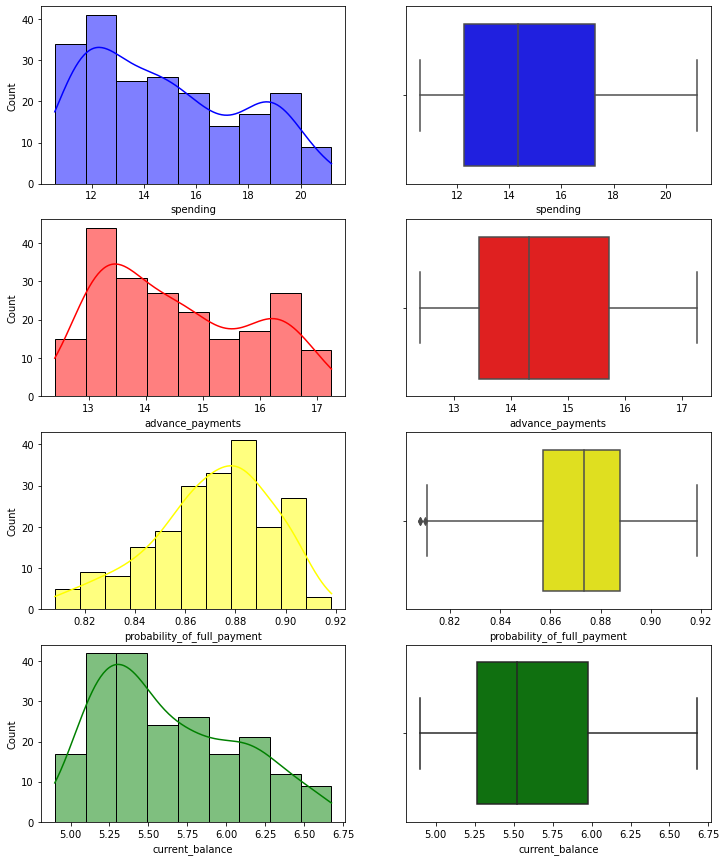

In [10]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,15)
sns.histplot(bank_df['spending'], kde=True,color='blue', ax=axes[0][0])
sns.boxplot(x='spending', data=bank_df,color='blue', ax=axes[0][1])
sns.histplot(bank_df['advance_payments'] , color='red',kde=True, ax=axes[1][0])
sns.boxplot(x='advance_payments', data=bank_df ,color='red', ax=axes[1][1])
sns.histplot(bank_df['probability_of_full_payment'] , kde=True,color='yellow', ax=axes[2][0])
sns.boxplot(x='probability_of_full_payment', data=bank_df,color='yellow', ax=axes[2][1])
sns.histplot(bank_df['current_balance'], kde=True,color='green', ax=axes[3][0])
sns.boxplot(x='current_balance', data=bank_df,color='green', ax=axes[3][1])
plt.show()

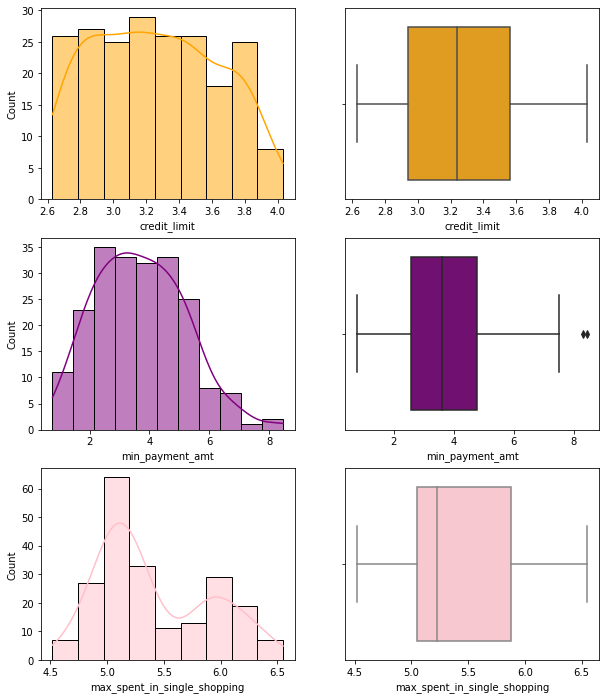

In [11]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(10,12)
sns.histplot(bank_df['credit_limit'], kde=True,color='orange', ax=axes[0][0])
sns.boxplot(x='credit_limit', data=bank_df,color='orange', ax=axes[0][1])
sns.histplot(bank_df['min_payment_amt'] , color='purple',kde=True, ax=axes[1][0])
sns.boxplot(x='min_payment_amt', data=bank_df ,color='purple', ax=axes[1][1])
sns.histplot(bank_df['max_spent_in_single_shopping'] , kde=True,color='pink', ax=axes[2][0])
sns.boxplot(x='max_spent_in_single_shopping', data=bank_df,color='pink', ax=axes[2][1])
plt.show()

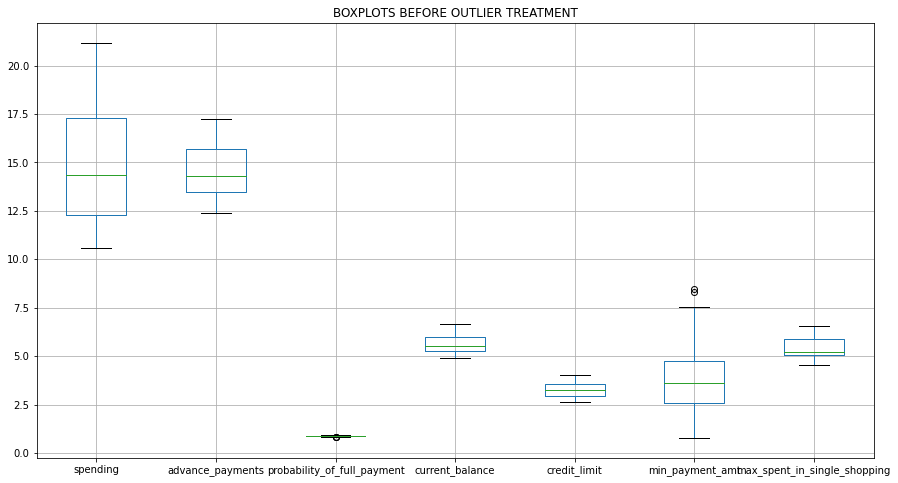

In [12]:
bank_df.boxplot(figsize=(15,8))
plt.title('BOXPLOTS BEFORE OUTLIER TREATMENT')
plt.show()

B.	MULTIVARIATE ANALYSIS
Multivariate Analysis is a Statistical procedure for analysis of data involving more than one type of variable(s). A Pair plot and Heat map has been created to fulfil the Multivariate Analysis of the data provided.


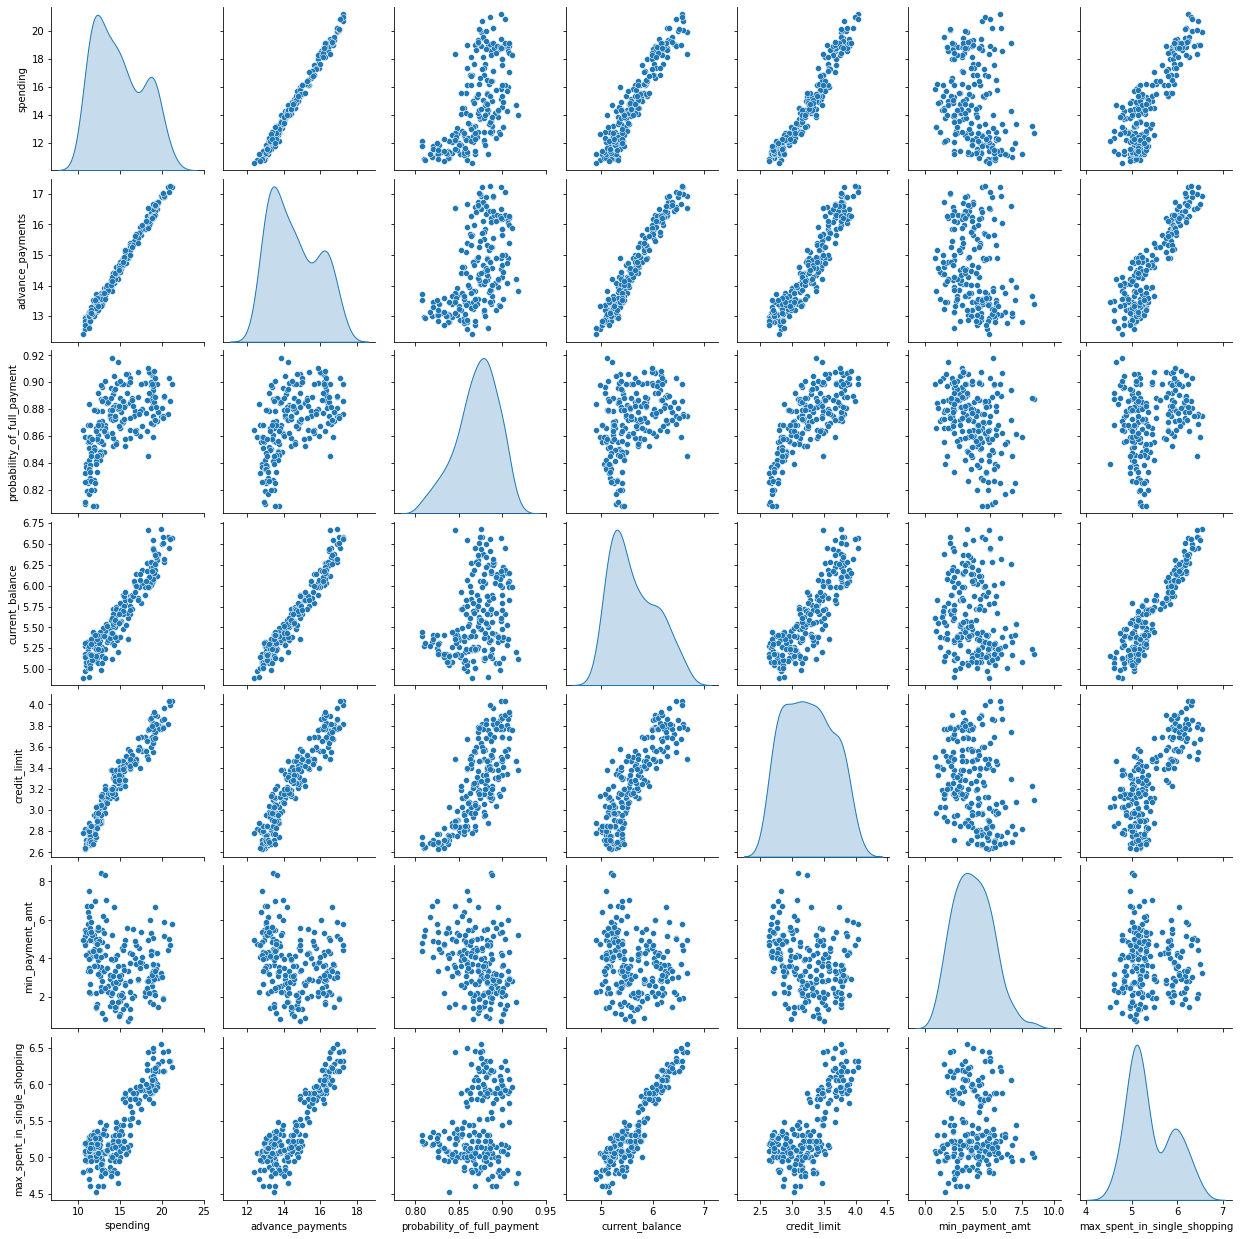

In [13]:
sns.pairplot(bank_df, diag_kind='kde')

The above of a Pair plot essentially helps us understand the relationship between all the numerical values in the dataset. It helps us compare the variables to one another in a way that we are made to deeply understand the trends and patterns of the dataset provided.

In [14]:
bank_df.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


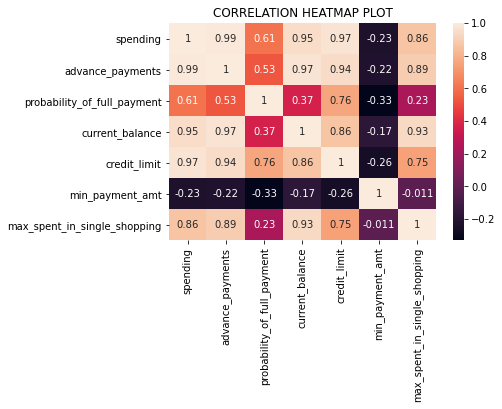

In [15]:
sns.heatmap(bank_df.corr(), annot=True, fmt=".2g")
plt.title('CORRELATION HEATMAP PLOT')
plt.show()

The above Heat map essentially shows us the correlation between pairs of different variables. It clearly shows us that the spending variable is highly positively correlated with the advance_payments, current_balance, credit_limit and max_spent_in_single_shopping. Thus telling us about the purchasing power of a customer. The more they spends, the more their credit limit and the more capable they are to make advance payments.
It also tells us that advance payments is highly positively correlated with current_balance, credit_limit and max_spent_in_single_shopping. While min_payment_amt is negatively correlated with every variable.



C.	TREATMENT OF OUTLIERS
One of the biggest downfall for any model performance is the outliers present in the data. Outliers ideally are the extreme values for the specific column which affects the generalization of the data and model.
We choose to treat the outlier values by checking with their respective lower ranges and upper ranges. We did the same by creating a user defined function as can be seen in the attached Jupyter notebook. There are outliers are present only in two variables of the seven.



In [16]:
bank_df1= bank_df.copy()
bank_df1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


In [17]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
lr,ur=remove_outlier(bank_df1['probability_of_full_payment'])
bank_df1['probability_of_full_payment']=np.where(bank_df1['probability_of_full_payment']>ur,ur,bank_df1['probability_of_full_payment'])
bank_df1['probability_of_full_payment']=np.where(bank_df1['probability_of_full_payment']<lr,lr,bank_df1['probability_of_full_payment'])

In [19]:
lr,ur=remove_outlier(bank_df1['min_payment_amt'])
bank_df1['min_payment_amt']=np.where(bank_df1['min_payment_amt']>ur,ur,bank_df1['min_payment_amt'])
bank_df1['min_payment_amt']=np.where(bank_df1['min_payment_amt']<lr,lr,bank_df1['min_payment_amt'])

<AxesSubplot:xlabel='probability_of_full_payment'>

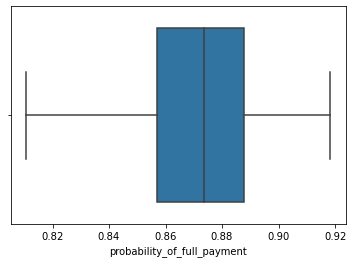

In [20]:
sns.boxplot(x=bank_df1.probability_of_full_payment)

<AxesSubplot:xlabel='min_payment_amt'>

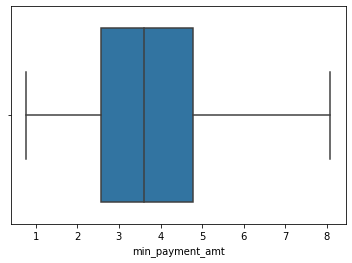

In [21]:
sns.boxplot(x=bank_df1.min_payment_amt)

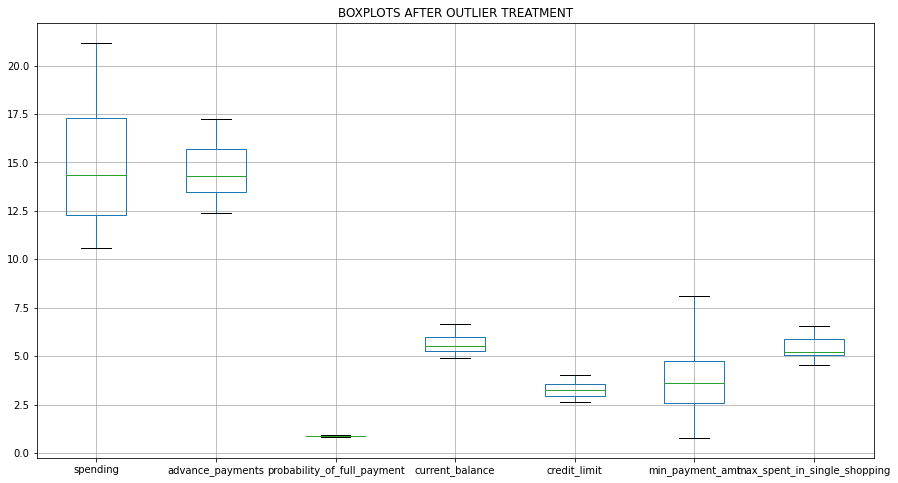

In [22]:
bank_df1.boxplot(figsize=(15,8))
plt.title('BOXPLOTS AFTER OUTLIER TREATMENT')
plt.show()

1.2 Do you think scaling is necessary for clustering in this case? Justify.

Often the variables of the data set are of different scales i.e. one variable is in millions and other in only 100. For e.g. in our data set spending is having values in thousands while advance_payments have values in hundreds and credit_limit has value in ten thousands. Since the data in these variables are of different scales, it is tough to compare these variables.
Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since, the range of values of data may vary widely, it becomes a necessary step in data pre-processing while using machine learning algorithms.
From the many ways there are to scale the data, I have used Z-score. A snippet of the scaled dataset can be seen below in Table 1.2.


In [23]:
from scipy.stats import zscore
Scaled_bank=bank_df1.apply(zscore)
Scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them.

After scaling the data, using Z-score we were instructed to apply hierarchical clustering to the scaled data and did the same. 

Hierarchical  clustering  is a method of cluster  analysis  which  seeks  to build a  hierarchy  of  clusters.  They are of two types:
•Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
•Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.

The linkage method used her is ‘average’, the truncate mode used is ‘lastp’ with a p of 25 to help us understand the Dendrogram better. The Average linkage method is defined as the distance between two clusters is defined as the average distance between each pair of points, one from each cluster.


In [25]:
link = linkage(Scaled_bank, method = 'average')

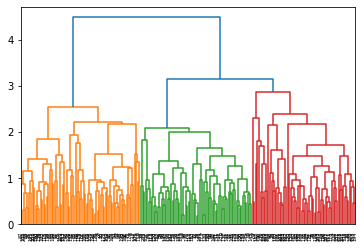

In [26]:
dend = dendrogram(link)

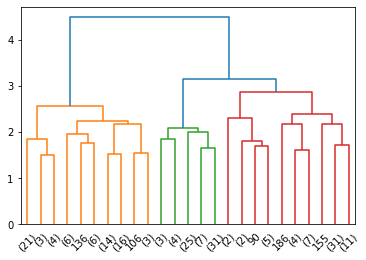

In [27]:
dend = dendrogram(link,truncate_mode='lastp',p = 25)

In [28]:
from scipy.cluster.hierarchy import fcluster

In [29]:
clusters = fcluster(link, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [30]:
bank_df1['clusters'] = clusters

In [31]:
bank_df1.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [32]:
bank_df1['clusters'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters, dtype: int64

In [33]:
aggdata=bank_df1.groupby('clusters').mean()
aggdata['Freq']=bank_df1['clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.916857,13.291000,0.846845,5.258300,2.846000,4.619000,5.115071,70
3,14.217077,14.195846,0.884869,5.442000,3.253508,2.759007,5.055569,65


The above Table is a clear representation of the 3 clusters divided and the count by the column name of frequency of each cluster added at the end. Cluster 1 has a count of 75, Cluster 2 has a count of 70 and lastly Cluster 3 has a count of 65. Cluster 1 consists of the Highest spenders while Cluster 2 consists of the Lowest spenders and Cluster 3 consists of Medium level spenders.

In [34]:
bank_df.to_csv('bankhcluster.csv')

In [35]:
from sklearn.cluster import KMeans

K-means clustering is the most used non-hierarchical clustering technique. It aims to partition n  observations  into k clusters  in  which  each  observation  belongs  to  the  cluster  whose  mean (centroid)  is  nearest  to  it,  serving  as  a  prototype  of  the  cluster.  It minimizes within-cluster variances (squared Euclidean distances).

There  are  many  methods  that  are  recommended  for  determination  of  an  optimal  number  of partitions/clusters.  The 2 main methods used here are Elbow method and Silhouette Method.

•	The Elbow Method: For a given number of clusters, the total within-cluster sum of squares (WCSS) is computed. The Elbow method looks at the total WCSS as a function of the number of clusters.


In [36]:
Scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [37]:
wss =[] 

In [38]:
for i in range(1,15):
    KM = KMeans(n_clusters=i)
    KM.fit(Scaled_bank)
    wss.append(KM.inertia_)

In [39]:
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.0356644664012,
 327.42456176186136,
 288.7437978983271,
 263.0753332678838,
 239.90155186131838,
 224.65525149800337,
 203.51750366685607,
 194.26361545470397,
 182.68257475258855,
 176.01853296643944,
 162.94110393525338]

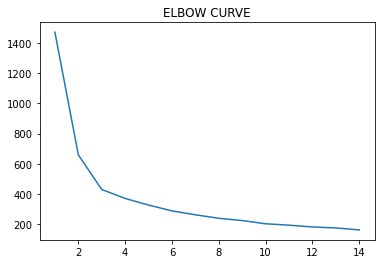

In [40]:
plt.plot(range(1,15),wss)
plt.title('ELBOW CURVE')
plt.show()

In the above Elbow curve it is clear that 3 is the optimal number of clusters that needs to be made with regards to the dataset at hand. There is prominent dip shown there at 3.

In [41]:
k_means = KMeans(n_clusters = 3)
k_means.fit(Scaled_bank)
labels = k_means.labels_

In [42]:
Scaled_bank["Clus_kmeans"] = labels
Scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1


In [43]:
from sklearn.metrics import silhouette_samples, silhouette_score

•	The Silhouette score Method: This  method  measures  how  tightly  the  observations  are  clustered  and  the  average  distance between clusters. The maximum value of the statistic indicates the optimum value of k.

In [44]:
silhouette_score(Scaled_bank,labels)

0.4791382037383962

In [45]:
sil_width = silhouette_samples(Scaled_bank,labels)
Scaled_bank["sil_width"] = sil_width
Scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_kmeans,sil_width
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998,1,0.584008
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582,0,0.388471
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107,1,0.651555
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961,2,0.565294
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813,1,0.400382


In [46]:
silhouette_samples(Scaled_bank,labels).min()

0.07688916871040143

In [47]:
from sklearn import metrics

In [48]:
scores = []
k_range = range(2, 15)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=12)
    km.fit(Scaled_bank)
    scores.append(metrics.silhouette_score(Scaled_bank, km.labels_))
    
scores

[0.4217131721602475,
 0.47786889697391116,
 0.3867207326227029,
 0.30228731312932194,
 0.30313273592722706,
 0.2596821955444268,
 0.2641055174602328,
 0.263078689270028,
 0.26021215075940346,
 0.2553087639478141,
 0.2543289180885191,
 0.24017981662395746,
 0.2441162937224853]

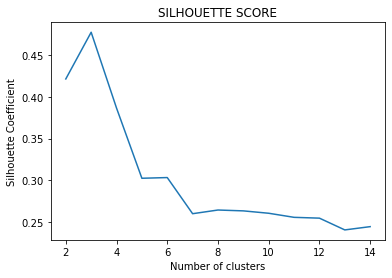

In [49]:
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('SILHOUETTE SCORE')
plt.show()

In the above Silhouette Score curve it is clear that 3 is the optimal number of clusters that needs to be made with regards to the dataset at hand. It is determined through the highest point on the graph.

In [50]:
bank_df1.to_csv('km.csv')

In [51]:
kmeans_dataset=bank_df1.copy()

In [52]:
kmeans = KMeans(n_clusters = 3, random_state = 123)
y_kmeans = kmeans.fit_predict(Scaled_bank)

In [53]:
cluster = pd.DataFrame(y_kmeans)
kmeans_dataset['cluster'] = cluster

In [54]:
kmeans_mean_cluster = pd.DataFrame(round(kmeans_dataset.groupby('cluster').mean(),1))
kmeans_mean_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
cluster,,,,,,,,
0,18.5,16.2,0.9,6.2,3.7,3.6,6.0,1.0
1,11.9,13.3,0.8,5.2,2.8,4.8,5.1,2.1
2,14.4,14.3,0.9,5.5,3.3,2.7,5.1,2.7


In [55]:
kmeans_dataset['cluster'].value_counts().sort_index()

0    67
1    71
2    72
Name: cluster, dtype: int64

In [56]:
aggdata1=kmeans_dataset.groupby('cluster').mean()
aggdata1['Freq']=kmeans_dataset['cluster'].value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters,Freq
cluster,,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,1.029851,67
1,11.865775,13.256479,0.847828,5.236394,2.849127,4.768609,5.107338,2.084507,71
2,14.393333,14.314028,0.881631,5.506069,3.253944,2.701253,5.115000,2.680556,72


The above Table is a clear representation of the 3 clusters divided and the count by the column name of frequency of each cluster added at the end. Cluster 0 has a count of 67, Cluster 1 has a count of 71 and lastly Cluster 3 has a count of 72. Cluster 0 consists of the Highest spenders while Cluster 1 consists of the Lowest spenders and Cluster 2 consists of Medium level spenders.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.
Cluster Group Profiles:
Group 1: High Spending - Hierarchical (Cluster 1), K-means (Cluster 0). They determine the highest spenders.
Group 2: Low Spending- Hierarchical (Cluster 3), K-means (Cluster 2). They determine the lowest spenders.
Group 3: Medium Spending- Hierarchical (Cluster 3), K-means (Cluster 2). They determine the medium spenders.

Promotional Strategies for each group:

Group 1: High Spending:
Their purchases are already highest in all the 3 clusters to make it higher, they don’t spend on only needs and necessities, they may be spend thrifts and have a real good purchasing power:
•	Better reward points may help.
•	If we increase their credit limits they would be lured to spending more.
•	Offer loans to them since they seem to be customers with good payment records too.
•	Tie ups with Luxury brands and offering exclusive discounts or cashbacks.

Group 2: Low Spending:
Their purchases are the lowest in all the 3 clusters to make it higher, since they spend on only needs and necessities:
•	These customers should be continuously reminded of making payments.
•	Incentivise them when they make payments on time or earlier.
•	Tie ups with renowned daily essential grocery store may drive them towards spending a little more on seeing attractive discounts or offers.
•	Offers on dining and take-away can be made available for them, everyone loves food.

Group 3: Medium Spending:
Their purchases are the medium and to make it higher, this group is usually a mix of both spending on necessities as well as on a few luxuries:
•	Their credit scores are usually pretty good, so that can be incentivised by either increasing their credit limits or by reducing the interest rates.
•	With this group loyalty cards will work best, they must be promoted.
•	Since they like a little luxury, lure them with additional benefits like lounge access.

Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network.

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [58]:
Insurance_df= pd.read_csv("insurance_part2_data.csv")

In [59]:
Insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [60]:
Insurance_df.tail()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA
2999,47,JZI,Airlines,No,11.55,Online,15,33.00,Bronze Plan,ASIA


In [61]:
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


There are 10 variables in total out of which Age, Commision, Duration and Sales are numeric in nature while the remaining 6 variables are Categorical in nature.

These Categorical variables include Agency_code, Type, Claimed, Channel, Product Name and Destination. These will later be encoded as we proceed.

There are no missing values in the data.

There are 9 independent variables and 1 dependent variable, ie: Claimed. Since we are to asked to investigate on the higher claim frequency of tour insurance.
The dependent variable here is also called the target variable.    


In [62]:
Insurance_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The above Table 2.1 has been derived using descriptive statistics to summarize the data. The function used is “df.describe(include=’all’)”. We can see the mean, count, median, standard deviation, quartile values, etc with this function. When a check for duplicates were done, there were none. The dataset looks good to go.

The Duration variable shows the minimum value as -1 which is clearly not how time can be measured, hence this may possibly be a wrong entry. Not treating it, just mentioning the same. The rest of the data looks pretty good.

In [63]:
Insurance_df.shape

(3000, 10)

In [64]:
Insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [65]:
dups=Insurance_df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 139


There are seen to be duplicate rows in the data, but there does not seem to be any unique identifier to differentiate the entries. And since this is an Insurance business there is a possiblity for the package designed for 2 or more people to be exactly the same. Hence the duplicate rows have not been removed from the dataset.

In [66]:
Insurance_df[dups]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [67]:
Insurance_df[Insurance_df.dtypes[(Insurance_df.dtypes=='object')|(Insurance_df.dtypes=='bool')].index].head()

,Agency_Code,Type,Claimed,Channel,Product Name,Destination
0,C2B,Airlines,No,Online,Customised Plan,ASIA
1,EPX,Travel Agency,No,Online,Customised Plan,ASIA
2,CWT,Travel Agency,No,Online,Customised Plan,Americas
3,EPX,Travel Agency,No,Online,Cancellation Plan,ASIA
4,JZI,Airlines,No,Online,Bronze Plan,ASIA


In [68]:
Insurance_df.dtypes.value_counts()

object     6
int64      2
float64    2
dtype: int64

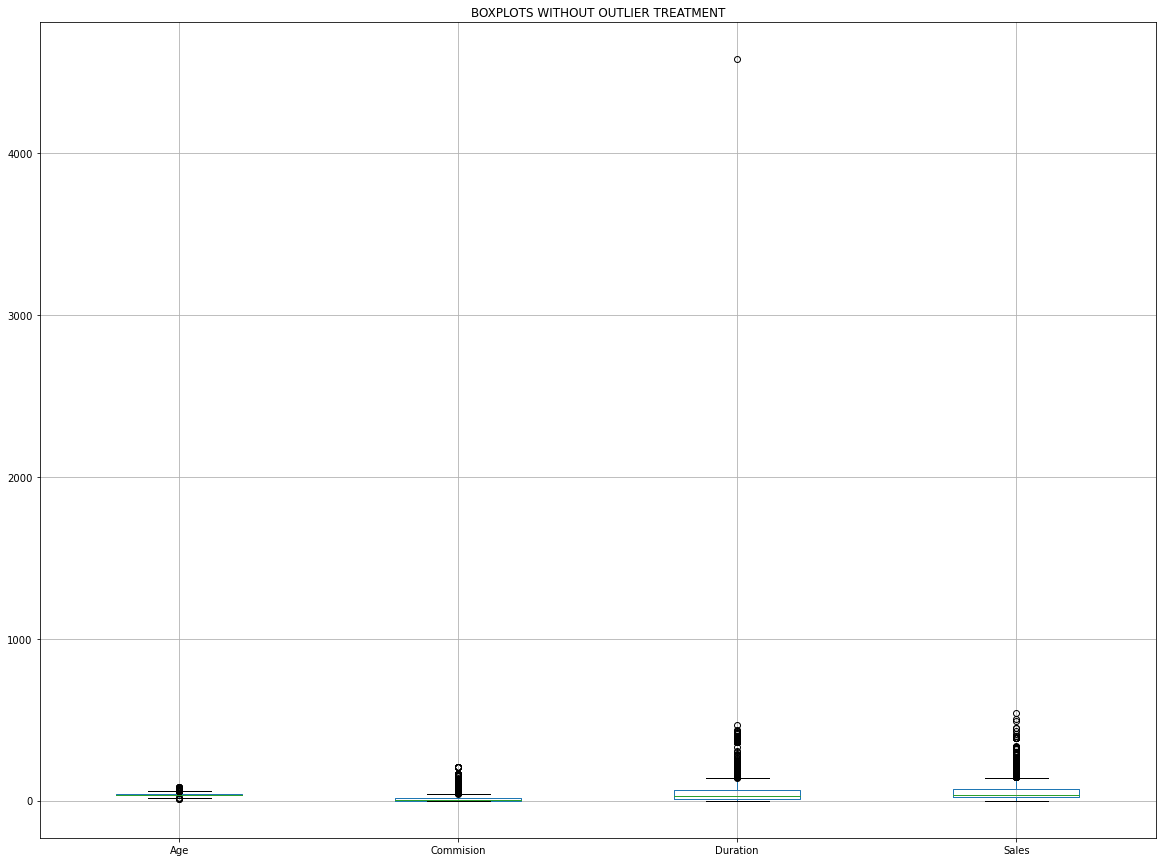

In [69]:
continuous=Insurance_df.dtypes[(Insurance_df.dtypes=='int64')|(Insurance_df.dtypes=='float64')].index
data_plot=Insurance_df[continuous]
data_plot.boxplot(figsize=(20,15));
plt.title('BOXPLOTS WITHOUT OUTLIER TREATMENT')
plt.show()

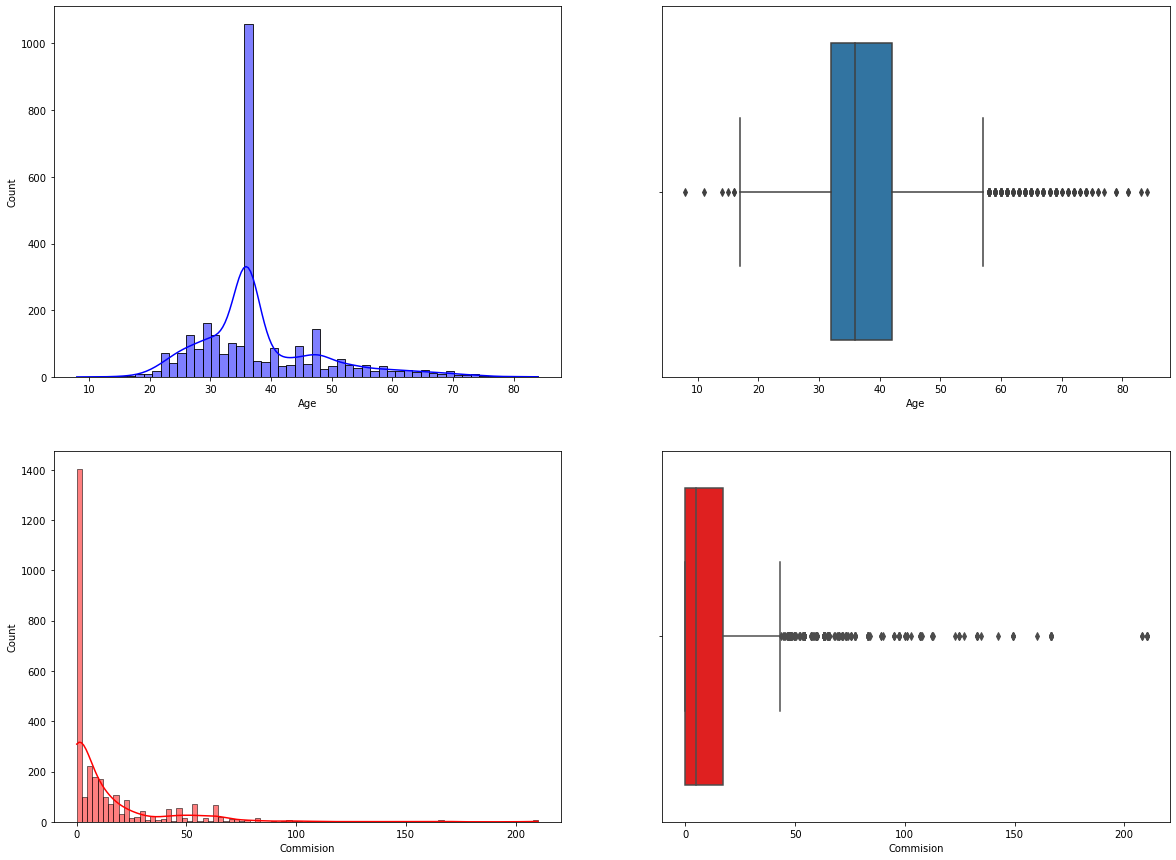

In [70]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(Insurance_df['Age'], kde=True, color='b', ax=axes[0][0])
sns.boxplot(x='Age', data=Insurance_df, ax=axes[0][1])
sns.histplot(Insurance_df['Commision'] , kde=True, color='r',ax=axes[1][0])
sns.boxplot(x='Commision', data=Insurance_df ,color='r', ax=axes[1][1])
plt.show()

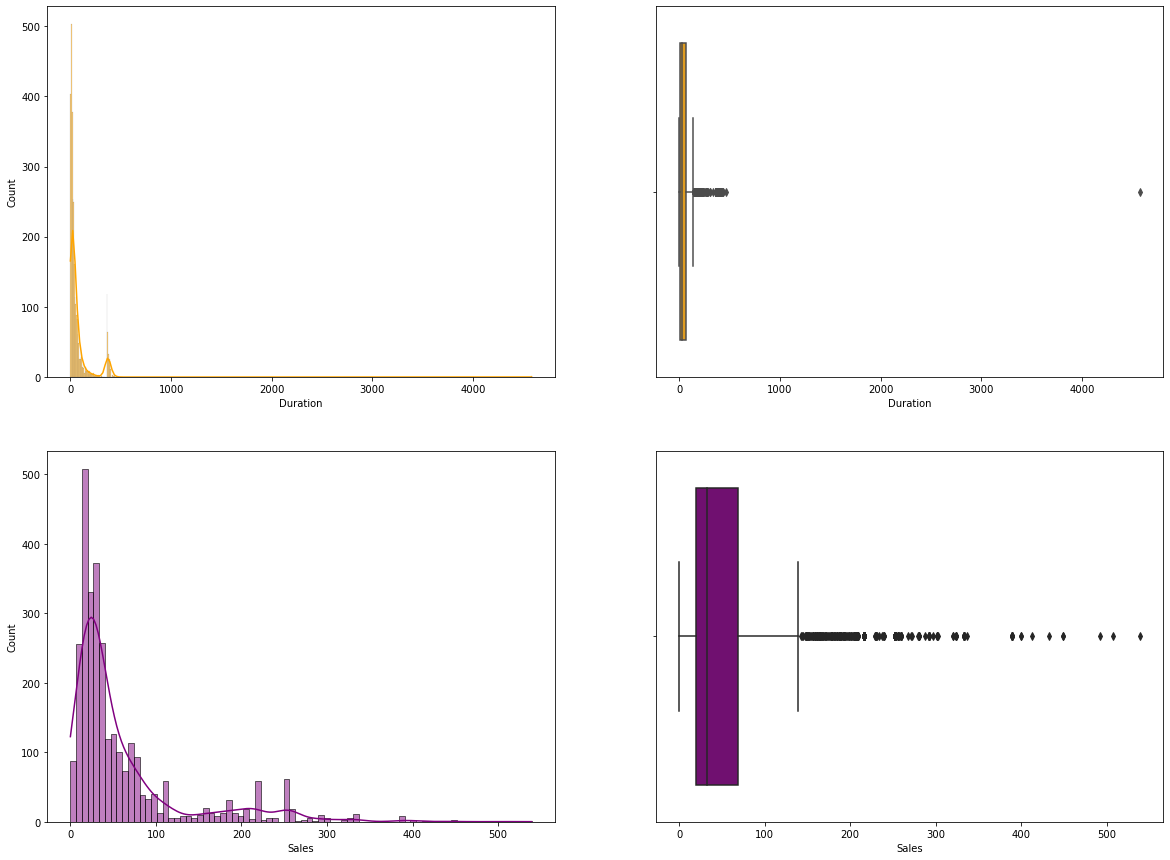

In [71]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20,15)
sns.histplot(Insurance_df['Duration'], kde=True, color='orange', ax=axes[0][0])
sns.boxplot(x='Duration', data=Insurance_df, color='orange',ax=axes[0][1])
sns.histplot(Insurance_df['Sales'] , kde=True, color='purple',ax=axes[1][0])
sns.boxplot(x='Sales', data=Insurance_df ,color='purple', ax=axes[1][1])
plt.show()

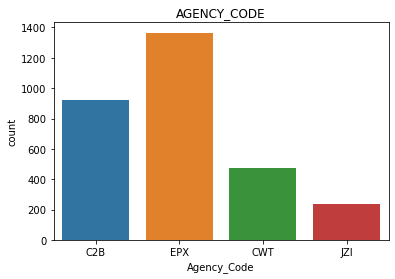

In [72]:
sns.countplot(data=Insurance_df, x='Agency_Code')
plt.title('AGENCY_CODE')
plt.show()

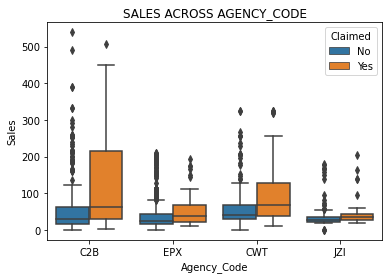

In [73]:
sns.boxplot(data = Insurance_df, x='Agency_Code',y='Sales', hue='Claimed')
plt.title('SALES ACROSS AGENCY_CODE')
plt.show()

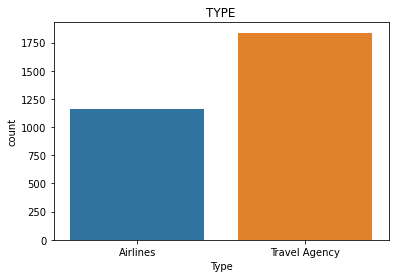

In [74]:
sns.countplot(data=Insurance_df, x='Type')
plt.title('TYPE')
plt.show()

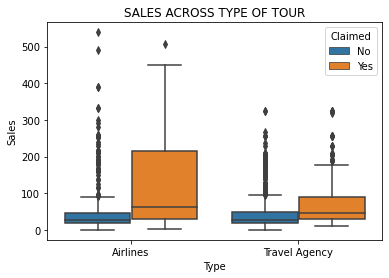

In [75]:
sns.boxplot(data = Insurance_df, x='Type',y='Sales', hue='Claimed')
plt.title('SALES ACROSS TYPE OF TOUR')
plt.show()

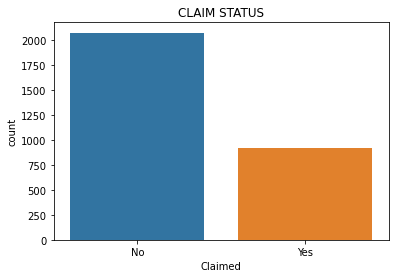

In [76]:
sns.countplot(data=Insurance_df, x='Claimed')
plt.title('CLAIM STATUS')
plt.show()

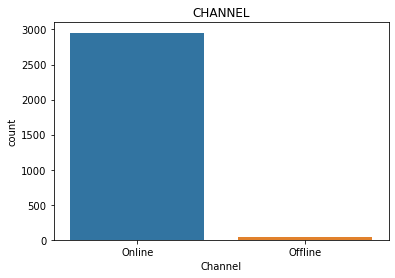

In [77]:
sns.countplot(data=Insurance_df, x='Channel')
plt.title('CHANNEL')
plt.show()

Text(0.5, 1.0, 'SALES ACROSS CHANNELS')

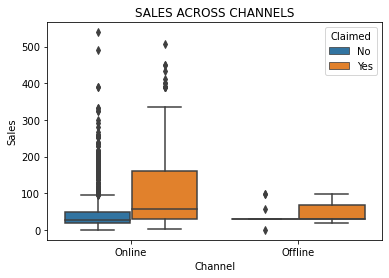

In [78]:
sns.boxplot(data = Insurance_df, x='Channel',y='Sales', hue='Claimed')
plt.title('SALES ACROSS CHANNELS')

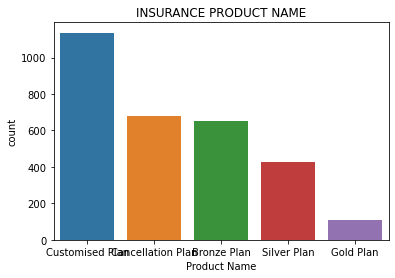

In [79]:
sns.countplot(data=Insurance_df, x='Product Name')
plt.title('INSURANCE PRODUCT NAME')
plt.show()

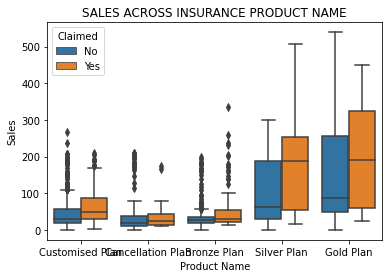

In [80]:
sns.boxplot(data = Insurance_df, x='Product Name',y='Sales', hue='Claimed')
plt.title('SALES ACROSS INSURANCE PRODUCT NAME')
plt.show()

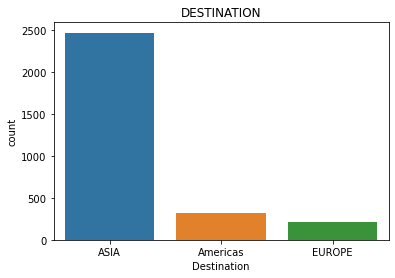

In [81]:
sns.countplot(data=Insurance_df, x='Destination')
plt.title('DESTINATION')
plt.show()

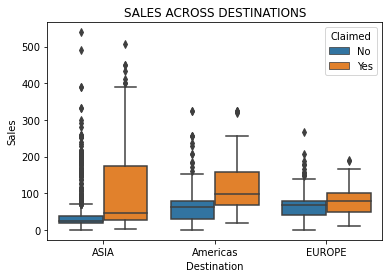

In [82]:
sns.boxplot(data = Insurance_df, x='Destination',y='Sales', hue='Claimed')
plt.title('SALES ACROSS DESTINATIONS')
plt.show()

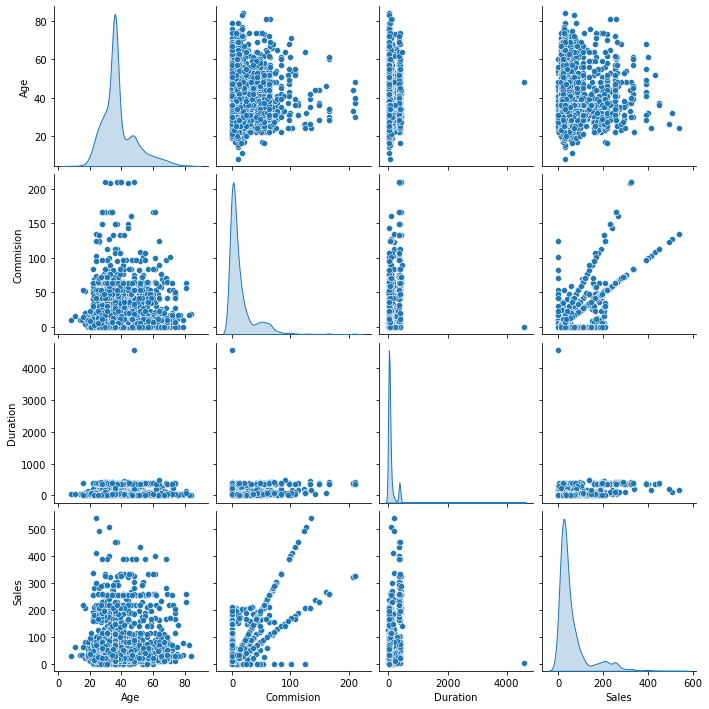

In [83]:
sns.pairplot(Insurance_df, diag_kind='kde')

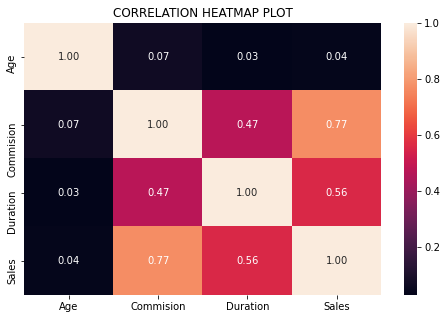

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(round(Insurance_df.corr(),2),fmt='.2f',annot=True)
plt.title('CORRELATION HEATMAP PLOT')
plt.show()

In [85]:
for feature in Insurance_df.columns: 
    if Insurance_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(Insurance_df[feature].unique()))
        print(pd.Categorical(Insurance_df[feature].unique()).codes)
        Insurance_df[feature] = pd.Categorical(Insurance_df[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [86]:
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   int8   
 2   Type          3000 non-null   int8   
 3   Claimed       3000 non-null   int8   
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   int8   
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   int8   
 9   Destination   3000 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [87]:
Insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Agency_Code,3000.0,1.306333,0.994060,0.0,0.0,2.00,2.000,3.00
Type,3000.0,0.612333,0.487299,0.0,0.0,1.00,1.000,1.00
Claimed,3000.0,0.308000,0.461744,0.0,0.0,0.00,1.000,1.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000.0,0.984667,0.122895,0.0,1.0,1.00,1.000,1.00
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00
Product Name,3000.0,1.661667,1.258726,0.0,1.0,2.00,2.000,4.00
Destination,3000.0,0.250000,0.575277,0.0,0.0,0.00,0.000,2.00


In [88]:
Insurance_df.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

In [89]:
X = Insurance_df.drop("Claimed" , axis=1)

Y = Insurance_df.pop("Claimed")

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.30, random_state = 111)

In [91]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [92]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [93]:
from sklearn import tree

train_char_label = ['No', 'Yes']
Claim_Tree_File = open('d:\claim_tree.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file=Claim_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Claim_Tree_File.close()

In [94]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion' : ['gini'],
    'max_depth': [5,6,7],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [200,300,400]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 10)

In [95]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [5, 6, 7],
                         'min_samples_leaf': [50, 100, 150],
                         'min_samples_split': [200, 300, 400]})

In [96]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 150,
 'min_samples_split': 200}

In [97]:
best_grid = grid_search.best_estimator_
best_grid

DecisionTreeClassifier(max_depth=5, min_samples_leaf=150, min_samples_split=200)

In [98]:
print (pd.DataFrame(best_grid.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.677479
Sales         0.215943
Product Name  0.094350
Duration      0.012228
Age           0.000000
Type          0.000000
Commision     0.000000
Channel       0.000000
Destination   0.000000


In [99]:
Ytrain_predict = best_grid.predict(X_train)
Ytest_predict = best_grid.predict(X_test)

In [100]:
print(classification_report(Y_train,Ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1473
           1       0.67      0.52      0.58       627

    accuracy                           0.78      2100
   macro avg       0.74      0.70      0.72      2100
weighted avg       0.77      0.78      0.77      2100



In [101]:
print(classification_report(Y_test,Ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       603
           1       0.70      0.53      0.60       297

    accuracy                           0.77       900
   macro avg       0.75      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



In [102]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,6,7],
    'max_features': [4,5,6],
    'min_samples_leaf': [75,100,150],
    'min_samples_split': [200,300,400],
    'n_estimators': [101, 301]
}

rfcl = RandomForestClassifier()

In [103]:
grid_search1 = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5, n_jobs=-1)

In [104]:
grid_search1.fit(X_train, Y_train)
print(grid_search1.best_params_)
best_grid_rfcl = grid_search1.best_estimator_
best_grid_rfcl

{'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 75, 'min_samples_split': 200, 'n_estimators': 301}


RandomForestClassifier(max_depth=5, max_features=4, min_samples_leaf=75,
                       min_samples_split=200, n_estimators=301)

In [105]:
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.372423
Product Name  0.288005
Sales         0.145267
Type          0.072804
Commision     0.067544
Duration      0.040114
Age           0.008180
Destination   0.005663
Channel       0.000000


In [106]:
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [107]:
print(classification_report(Y_train,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1473
           1       0.70      0.49      0.58       627

    accuracy                           0.79      2100
   macro avg       0.76      0.70      0.72      2100
weighted avg       0.78      0.79      0.77      2100



In [108]:
print(classification_report(Y_test,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       603
           1       0.72      0.47      0.57       297

    accuracy                           0.77       900
   macro avg       0.75      0.69      0.71       900
weighted avg       0.76      0.77      0.75       900



In [109]:
Scaled_Ins=Insurance_df.apply(zscore)
Scaled_Ins.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947162,-1.314358,-1.256796,-0.542807,0.124788,-0.470051,-0.816433,0.268835,-0.434646
1,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.268605,-0.569127,0.268835,-0.434646
2,0.086888,-0.308215,0.795674,-0.337133,0.124788,-0.499894,-0.711940,0.268835,1.303937
3,-0.199870,0.697928,0.795674,-0.570282,0.124788,-0.492433,-0.484288,-0.525751,-0.434646
4,-0.486629,1.704071,-1.256796,-0.323003,0.124788,-0.126846,-0.597407,-1.320338,-0.434646


In [110]:
param_grid_nncl = {
    'hidden_layer_sizes': [100], 
    'max_iter': [800,900,1000], 
    'solver': ['adam','sgd'], 
    'tol': [0.01,0.001], 
}

nncl = MLPClassifier()

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [111]:
grid_search_nncl.fit(X_train, Y_train)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=100, max_iter=1000, tol=0.01)

In [112]:
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [113]:
print(classification_report(Y_train,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1473
           1       0.70      0.47      0.56       627

    accuracy                           0.78      2100
   macro avg       0.75      0.69      0.71      2100
weighted avg       0.77      0.78      0.77      2100



In [114]:
print(classification_report(Y_test,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84       603
           1       0.72      0.46      0.56       297

    accuracy                           0.76       900
   macro avg       0.75      0.69      0.70       900
weighted avg       0.76      0.76      0.75       900



In [115]:
Models=[dt_model,rfcl,nncl]
Models_names={dt_model:'DecisionTreeClassifier',rfcl:'RandomForestClassifier',nncl:'ANN'}

Confusion Matrix for DecisionTreeClassifier model is


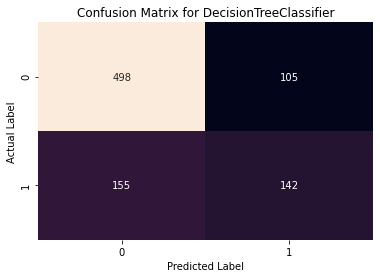

Confusion Matrix for RandomForestClassifier model is


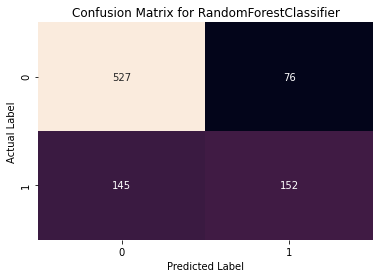

Confusion Matrix for ANN model is


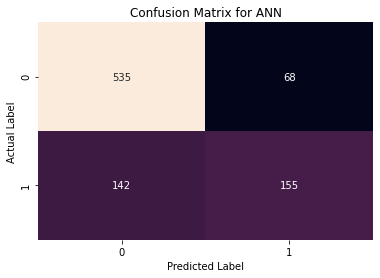

In [128]:
for i in Models:
    i.fit(X_train,Y_train)
    print('Confusion Matrix for {} model is'.format(Models_names[i]))
    sns.heatmap(confusion_matrix(Y_test,i.predict(X_test)),annot=True,fmt='d',cbar=False)
    plt.title('Confusion Matrix for {}'.format(Models_names[i]))
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

AUC: 0.812


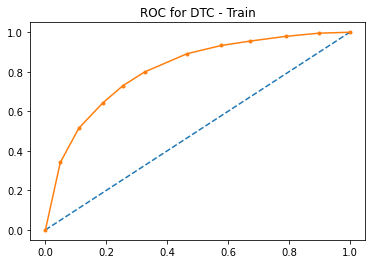

In [117]:
probs = best_grid.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for DTC - Train')
plt.show()

AUC: 0.803


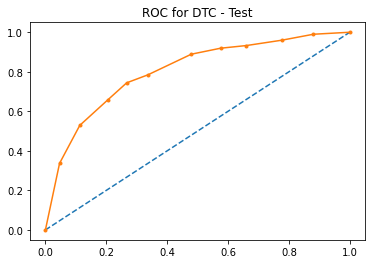

In [118]:
probs = best_grid.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for DTC - Test')
plt.show()

AUC: 0.825


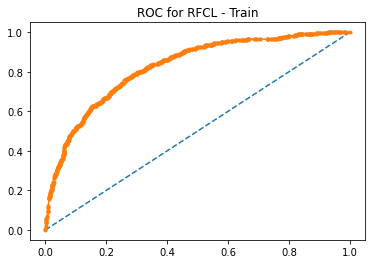

In [119]:
probs = best_grid_rfcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for RFCL - Train')
plt.show()

AUC: 0.814


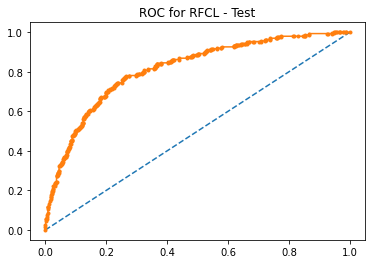

In [120]:
probs = best_grid_rfcl.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for RFCL - Test')
plt.show()

AUC: 0.813


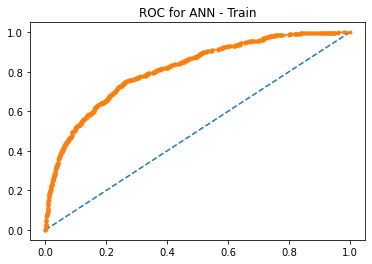

In [121]:
probs = best_grid_nncl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for ANN - Train')
plt.show()

AUC: 0.802


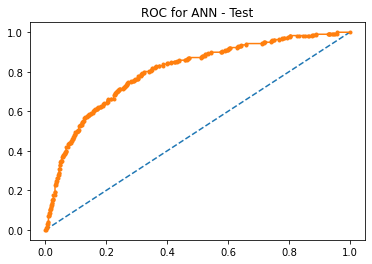

In [122]:
probs = best_grid_nncl.predict_proba(X_test)
probs = probs[:, 1]
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.title('ROC for ANN - Test')
plt.show()